# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from thesis_graph.data import load_thesis_csv

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

## Load data

In [ ]:
thesis_df = load_thesis_csv("data/committee.csv")
thesis_df.head()

## Data quality and completeness

### Missing values

In [ ]:
thesis_df.info()

**Conclusion**: The dataset is complete with no missing values.

## Thesis
### Thesis status

In [ ]:
thesis_df["thesis_status"].value_counts().plot.bar()
plt.show()

### Thesis title

In [ ]:
thesis_df["thesis_title_mk"].str.len().plot.hist(bins=30, color="orange")
thesis_df["thesis_title_en"].str.len().plot.hist(
    bins=30, color="green", xlabel="Thesis Title Length", alpha=0.7
)
plt.legend(["Title in Macedonian", "Title in English"])
plt.show()

### Thesis abstract

In [ ]:
thesis_df["thesis_desc_mk"].str.len().plot.hist(bins=50, color="orange")
thesis_df["thesis_desc_en"].str.len().plot.hist(
    bins=50, color="green", xlabel="Thesis Description Length", alpha=0.7
)
plt.legend(["Description in Macedonian", "Description in English"])
plt.show()

## Mentor

### Workload distribution

In [ ]:
mentor_counts = thesis_df["mentor"].value_counts().to_frame()
display(mentor_counts.head(10))
display(mentor_counts.tail(10))
display(mentor_counts.describe())

### Fields of interest

In [35]:
researchers_df = pd.read_csv(
    "data/researchers.csv",
    converters={
        "interests": lambda x: x.split("|") if x else [],
        "articles": lambda x: x.split("|") if x else [],
    },
)
researchers_df.head()

,name,interests,articles
0,Костадин Мишев,"[data science, natural language processing, sp...",[Evaluation of Sentiment Analysis in Finance: ...
1,Петре Ламески,"[data science, software engineering, applied ai]",[Improving activity recognition accuracy in am...
2,Игор Мишковски,"[network science, statistical physics, data mi...","[Vulnerability of complex networks, Mobile pho..."
3,Дејан Спасов,"[computations, communications]",[Decoding of lte turbo codes initialized with ...
4,Смилка Јанеска Саркањац,[strategic management of information technolog...,[Analysis of introducing one stop shop adminis...


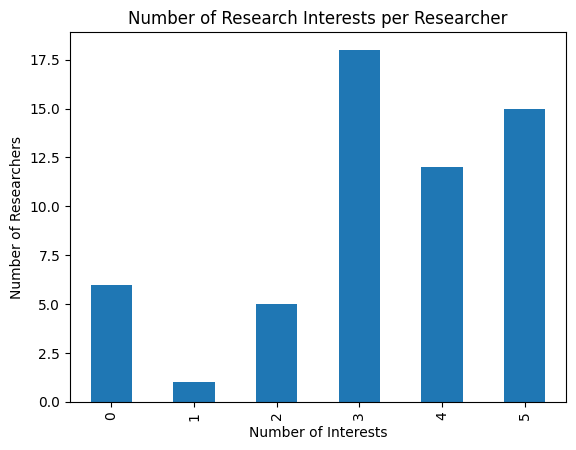

In [60]:
researchers_df["interests"].str.len().value_counts().sort_index().plot.bar(
    title="Number of Research Interests per Researcher",
    xlabel="Number of Interests",
    ylabel="Number of Researchers",
)
plt.show()

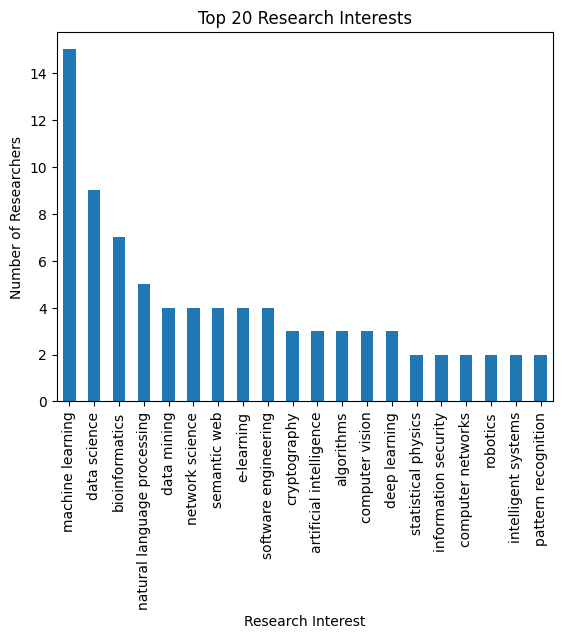

In [61]:
researchers_df["interests"].explode().value_counts().head(20).plot.bar(
    title="Top 20 Research Interests",
    xlabel="Research Interest",
    ylabel="Number of Researchers",
)
plt.show()

## Commision members

In [ ]:
commision_count = (
    pd.concat([thesis_df["c1"], thesis_df["c2"]]).value_counts().to_frame()
)
commision_count.head()

### Workload distribution

In [ ]:
display(commision_count.head(10))
display(commision_count.tail(10))
display(commision_count.describe())

## Mentor - Commission member pairs

In [ ]:
mentor_commission_pairs = pd.melt(
    thesis_df,
    id_vars=["mentor"],
    value_vars=["c1", "c2"],
    value_name="commission_member",
)

mentor_commission_counts = (
    mentor_commission_pairs.groupby(["mentor", "commission_member"])
    .agg(count=("commission_member", "count"))
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x.sort_values(ascending=False, by="count"))
)

mentor_totals = (
    mentor_commission_counts.groupby(level=0)
    .agg(sum=("count", "sum"))
    .sort_values(ascending=False, by="sum")
)
mentor_commission_counts = mentor_commission_counts.reindex(
    mentor_totals.index, level=0
)

mentor_commission_counts = mentor_commission_counts.reset_index()

display(mentor_commission_counts.head(10))
display(mentor_commission_counts.tail(10))

### Mentor commission diversity

In [ ]:
commission_diversity = (
    mentor_commission_counts.groupby("mentor")
    .agg(commission_diversity=("commission_member", "count"))
    .sort_values(ascending=False, by="commission_diversity")
)

display(commission_diversity.head(10))
display(commission_diversity.tail(10))
display(commission_diversity.describe())